In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

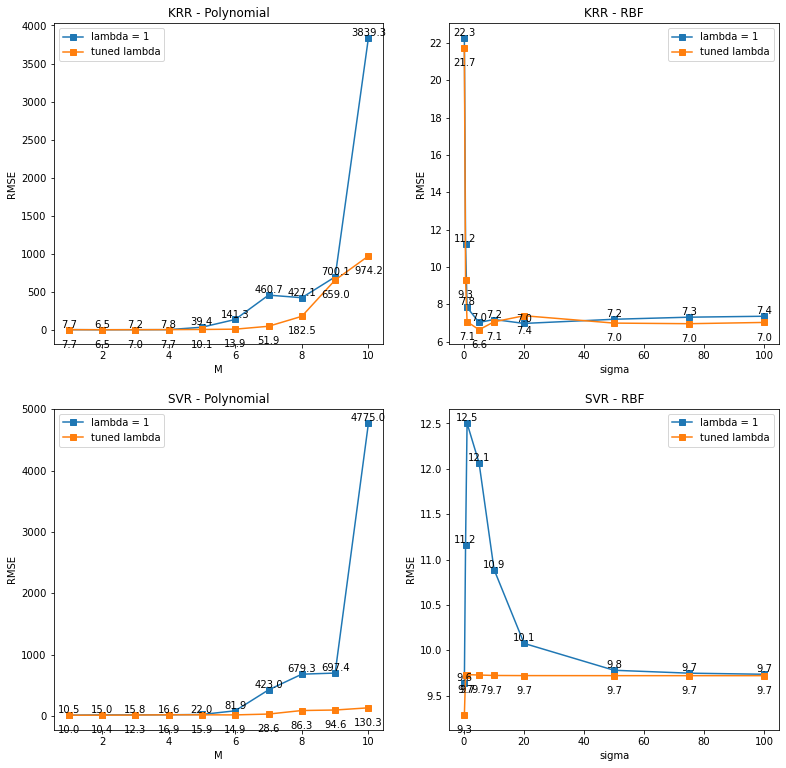

In [8]:
df = pd.read_csv("results.csv", index_col="index")
figure, axis = plt.subplots(2, 2, figsize=(13,13))
for i, model in enumerate(["krr", "svr"]):
    df_model = df[df["model"] == model]
    for j, feature in enumerate(["M", "sigma"]):
        df_feature = df_model[df_model["feature_type"] == feature]
        for lambdaType in ["lambda = 1", "tuned lambda"]:
            df_rmse = df_feature[df_feature["lambda_type"] == lambdaType]
            #print("Best rmse", np.min(df_rmse["rmse"]))
            axis[i, j].plot(df_rmse["feature_value"].values, df_rmse["rmse"].values, marker = 's', label=lambdaType)

            if lambdaType == "lambda = 1":
                for label, x, y in zip(df_rmse["rmse"].values, df_rmse["feature_value"].values, df_rmse["rmse"].values):
                    axis[i, j].annotate(
                        np.round(label,1),
                        xy=(x, y), xytext=(0, 10),
                        textcoords='offset points', ha = "center", va='top')
                    
            else:
                for label, x, y in zip(df_rmse["rmse"].values, df_rmse["feature_value"].values, df_rmse["rmse"].values):
                    axis[i, j].annotate(
                        np.round(label,1),
                        xy=(x, y), xytext=(0, -20),
                        textcoords='offset points', ha = "center", va='bottom')
        
        if model == "krr":
            model2 = "KRR"
        else:
            model2 = "SVR"

        if feature == "M":
            kernel = "Polynomial"
        else:
            kernel = "RBF"
        axis[i, j].set_title(f"{model2} - {kernel}")
        axis[i, j].set_ylabel("RMSE")
        axis[i, j].set_xlabel(feature)

        axis[i, j].legend()
plt.show()